<a href="https://colab.research.google.com/github/zeynepmert/Workintech_data_analysis_graduation_project/blob/tuba/python/Orders_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

orders = pd.read_csv("orders_updated.csv")
sales = pd.read_csv("sales.csv")

orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')
orders['delivery_date'] = pd.to_datetime(orders['delivery_date'], errors='coerce')

orders['delivery_time_days'] = (orders['delivery_date'] - orders['order_date']).dt.days

# Orders + Sales birleştirme
merged = pd.merge(sales, orders, on="order_id", how="left")
merged = merged.drop(columns=['payment'])

merged

,sales_id,order_id,product_id,price_per_unit,quantity,total_price,customer_id,order_date,delivery_date,delivery_time,delivery_time_days
0,0,1,218,106,2,212,64,2021-08-30,2021-09-24,25 days,25
1,1,1,481,118,1,118,64,2021-08-30,2021-09-24,25 days,25
2,2,1,2,96,3,288,64,2021-08-30,2021-09-24,25 days,25
3,3,1,1002,106,2,212,64,2021-08-30,2021-09-24,25 days,25
4,4,1,691,113,3,339,64,2021-08-30,2021-09-24,25 days,25
...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,998,321,109,2,218,407,2021-05-05,2021-05-21,16 days,16
4996,4996,998,251,95,3,285,407,2021-05-05,2021-05-21,16 days,16
4997,4997,999,872,113,1,113,428,2021-06-15,2021-07-12,27 days,27
4998,4998,999,998,106,2,212,428,2021-06-15,2021-07-12,27 days,27


Aylık Sipariş Sayısı (Örneğin):
  order_date  order_count
0 2021-01-01          109
1 2021-02-01           94
2 2021-03-01          118
3 2021-04-01          101
4 2021-05-01           84


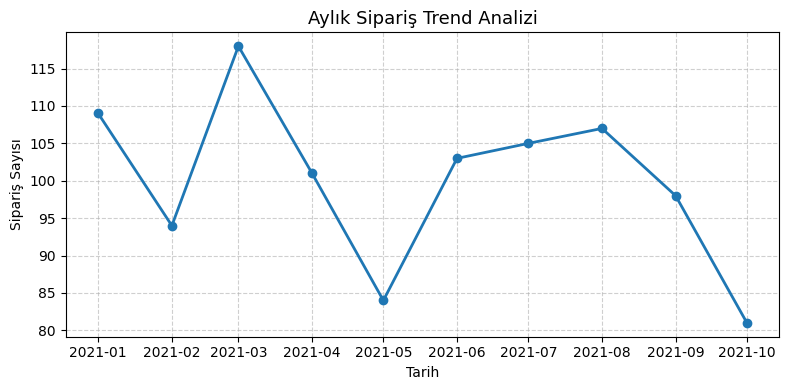

In [2]:
import matplotlib.pyplot as plt

#Aylık bazda sipariş sayısı hesaplanması

orders_trend = (
    orders.groupby(orders['order_date'].dt.to_period('M'))
    .size()
    .reset_index(name='order_count')
)

# Period nesnesini datetime'a
orders_trend['order_date'] = orders_trend['order_date'].dt.to_timestamp()

print("Aylık Sipariş Sayısı (Örneğin):")
print(orders_trend.head())

# Görselleştirme
plt.figure(figsize=(8,4))
plt.plot(orders_trend['order_date'], orders_trend['order_count'], marker='o', linestyle='-', linewidth=2)
plt.title("Aylık Sipariş Trend Analizi", fontsize=13)
plt.xlabel("Tarih")
plt.ylabel("Sipariş Sayısı")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

TESLİMAT SÜRESİ ANALİZİ
-----------------------------
Toplam Sipariş Sayısı: 1000
Minimum Teslim Süresi: 1 gün
Ortalama Teslim Süresi: 14.08 gün
Medyan (Ortanca): 14 gün
Maksimum Teslim Süresi: 27 gün
Standart Sapma: 7.71 gün
IQR (Q3 - Q1): 13.0 gün


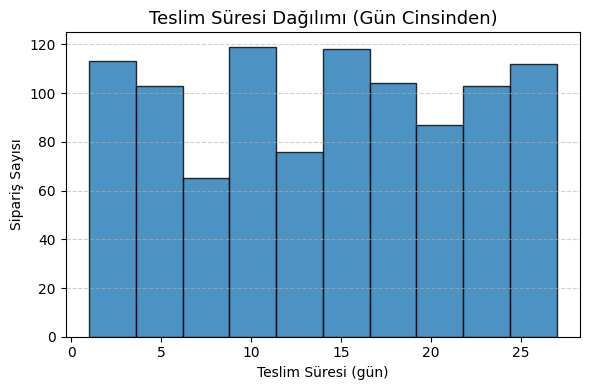

In [3]:
#Teslimat sürelerinin analizi

delivery_stats = orders['delivery_time_days'].describe()

print("TESLİMAT SÜRESİ ANALİZİ")
print("-----------------------------")
print(f"Toplam Sipariş Sayısı: {int(delivery_stats['count'])}")
print(f"Minimum Teslim Süresi: {int(delivery_stats['min'])} gün")
print(f"Ortalama Teslim Süresi: {round(delivery_stats['mean'], 2)} gün")
print(f"Medyan (Ortanca): {int(delivery_stats['50%'])} gün")
print(f"Maksimum Teslim Süresi: {int(delivery_stats['max'])} gün")
print(f"Standart Sapma: {round(delivery_stats['std'], 2)} gün")
print(f"IQR (Q3 - Q1): {round(delivery_stats['75%'] - delivery_stats['25%'], 2)} gün")

# Görselleştirme
plt.figure(figsize=(6,4))
plt.hist(orders['delivery_time_days'], bins=10, edgecolor='black', alpha=0.8)
plt.title("Teslim Süresi Dağılımı (Gün Cinsinden)", fontsize=13)
plt.xlabel("Teslim Süresi (gün)")
plt.ylabel("Sipariş Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


ORTALAMA SİPARİŞ TUTARI (AOV)
---------------------------------
Toplam Sipariş Sayısı: 993
Ortalama Sipariş Tutarı: 1039.07 birim


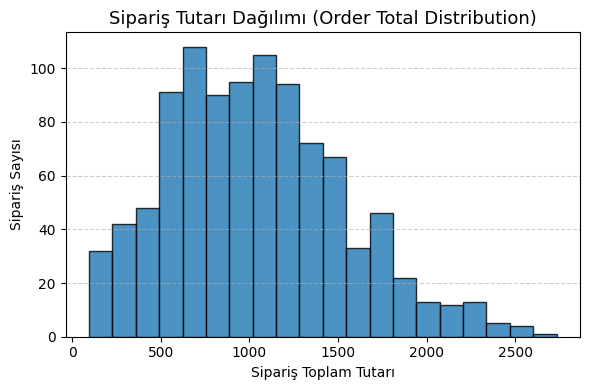

In [4]:
#Ortalama sipariş tutarının hesaplanması

if 'total_price' in sales.columns:
    order_totals = sales.groupby('order_id')['total_price'].sum().reset_index(name='order_total')

    aov = order_totals['order_total'].mean()

    print("ORTALAMA SİPARİŞ TUTARI (AOV)")
    print("---------------------------------")
    print(f"Toplam Sipariş Sayısı: {order_totals.shape[0]}")
    print(f"Ortalama Sipariş Tutarı: {round(aov, 2)} birim")

# Görselleştirme
    plt.figure(figsize=(6,4))
    plt.hist(order_totals['order_total'], bins=20, edgecolor='black', alpha=0.8)
    plt.title("Sipariş Tutarı Dağılımı (Order Total Distribution)", fontsize=13)
    plt.xlabel("Sipariş Toplam Tutarı")
    plt.ylabel("Sipariş Sayısı")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

else:
    print(" 'total_price' sütunu sales tablosunda bulunamadı.")


 EN ÇOK HARCAMA YAPAN 10 MÜŞTERİ:
     customer_id  total_spent
166          282         7632
350          571         6640
409          664         6341
422          683         5657
120          206         5581
346          566         5435
212          348         5119
506          813         4969
287          465         4807
446          727         4428


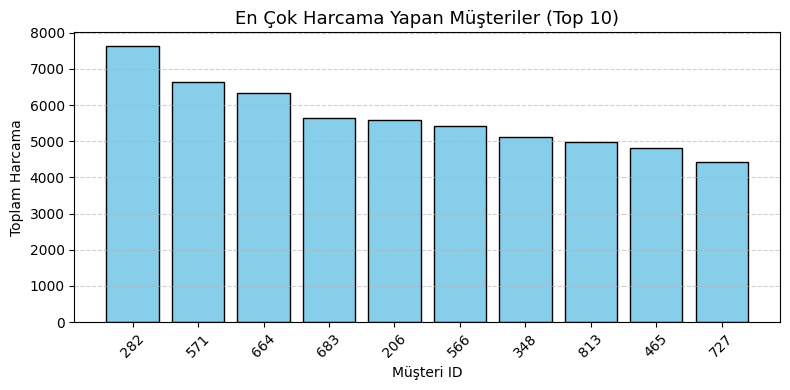

In [5]:
#En çok harcama yapan on müşterinin hesaplanması
customer_sales = (
    merged.groupby('customer_id')['total_price']
    .sum()
    .reset_index(name='total_spent')
)

customer_avg = (
    merged.groupby('customer_id')['total_price']
    .mean()
    .reset_index(name='avg_order_value')
)

top_customers = customer_sales.sort_values(by='total_spent', ascending=False).head(10)

print(" EN ÇOK HARCAMA YAPAN 10 MÜŞTERİ:")
print(top_customers)

# Görselleştirme
plt.figure(figsize=(8,4))
plt.bar(top_customers['customer_id'].astype(str), top_customers['total_spent'], color='skyblue', edgecolor='black')
plt.title("En Çok Harcama Yapan Müşteriler (Top 10)", fontsize=13)
plt.xlabel("Müşteri ID")
plt.ylabel("Toplam Harcama")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



 EN ÇOK GELİR GETİREN 10 ÜRÜN:
     product_id  total_revenue
76           78           2832
465         472           2714
695         707           2499
570         579           2400
824         843           2373
478         486           2360
725         740           2289
713         727           2261
180         182           2254
93           95           2124


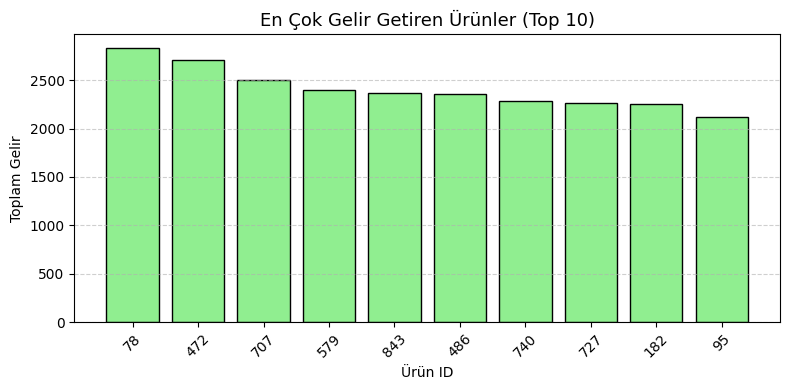


 Ürün Gelir Dağılımı Özeti:
count    1233.000000
mean      836.820762
std       437.651704
min        91.000000
25%       510.000000
50%       784.000000
75%      1089.000000
max      2832.000000
Name: total_revenue, dtype: float64


In [6]:
#En çok gelir getiren on ürünün hesaplanması

product_sales = (
    sales.groupby('product_id')['total_price']
    .sum()
    .reset_index(name='total_revenue')
)

top_products = product_sales.sort_values(by='total_revenue', ascending=False).head(10)

print(" EN ÇOK GELİR GETİREN 10 ÜRÜN:")
print(top_products)

# Görselleştirme
plt.figure(figsize=(8,4))
plt.bar(top_products['product_id'].astype(str), top_products['total_revenue'], color='lightgreen', edgecolor='black')
plt.title("En Çok Gelir Getiren Ürünler (Top 10)", fontsize=13)
plt.xlabel("Ürün ID")
plt.ylabel("Toplam Gelir")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#  Ürün gelir dağılımı
print("\n Ürün Gelir Dağılımı Özeti:")
print(product_sales['total_revenue'].describe())


Ortalama Müşteri Başına Sipariş Sayısı: 1.62


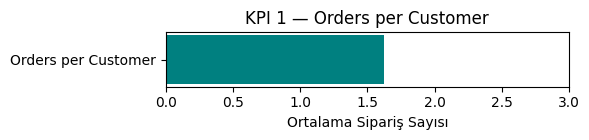

In [7]:
#Ortalama müşteri başına sipariş sayısı hesaplanması

orders_per_customer = orders['order_id'].nunique() / orders['customer_id'].nunique()

print(f"Ortalama Müşteri Başına Sipariş Sayısı: {orders_per_customer:.2f}")

plt.figure(figsize=(6,1.5))
plt.barh(['Orders per Customer'], [orders_per_customer], color='teal')
plt.xlim(0, max(orders_per_customer*1.5, 3))
plt.title("KPI 1 — Orders per Customer")
plt.xlabel("Ortalama Sipariş Sayısı")
plt.tight_layout()
plt.show()

Ortalama Aylık Sipariş Sıklığı: 1.05 sipariş / müşteri


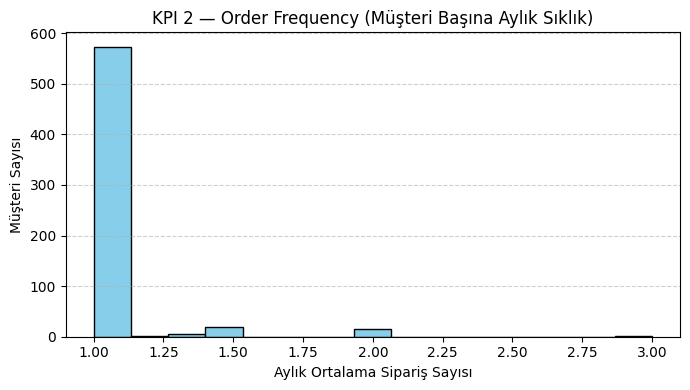

In [8]:
#Ortalama sipariş sıklığı hesaplanması

# order_date'leri aylık perioda çevirildi
orders['order_month'] = orders['order_date'].dt.to_period('M')

# Müşteri başına kaç farklı ayda sipariş vermiş - ay bazlı aktiflik
customer_months = (
    orders.groupby('customer_id')['order_month']
    .nunique()
    .reset_index(name='active_months')
)

# Ortalama sipariş sıklığı = toplam sipariş / aktif ay sayısı
customer_orders = (
    orders.groupby('customer_id')['order_id']
    .count()
    .reset_index(name='total_orders')
)

freq = pd.merge(customer_orders, customer_months, on='customer_id')
freq['order_frequency'] = freq['total_orders'] / freq['active_months']

# Ortalama sipariş sıklığı
order_frequency_mean = freq['order_frequency'].mean()

print(f"Ortalama Aylık Sipariş Sıklığı: {round(order_frequency_mean, 2)} sipariş / müşteri")

# Görselleştirme
plt.figure(figsize=(7,4))
plt.hist(freq['order_frequency'], bins=15, edgecolor='black', color='skyblue')
plt.title("KPI 2 — Order Frequency (Müşteri Başına Aylık Sıklık)")
plt.xlabel("Aylık Ortalama Sipariş Sayısı")
plt.ylabel("Müşteri Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Aylık Sipariş Artış Oranları (%):
  order_date  order_count  growth_rate
5 2021-06-01          103    22.619048
6 2021-07-01          105     1.941748
7 2021-08-01          107     1.904762
8 2021-09-01           98    -8.411215
9 2021-10-01           81   -17.346939


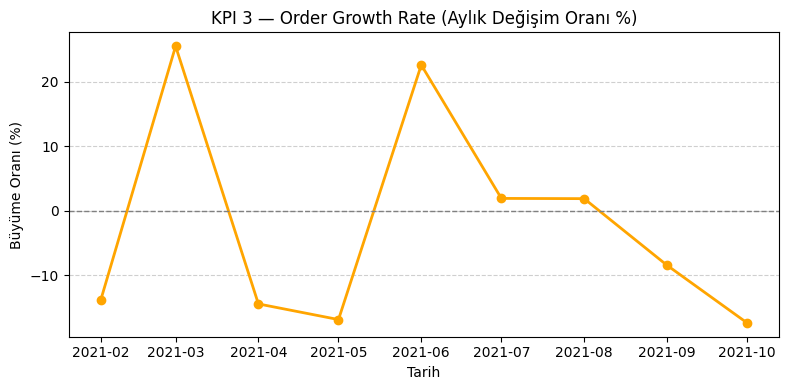

In [9]:
# Aylık sipariş sayısının hesaplanması

orders_trend = (
    orders.groupby(orders['order_date'].dt.to_period('M'))
    .size()
    .reset_index(name='order_count')
)

# Aylık büyüme oranını (yüzde değişim) hesapla
orders_trend['growth_rate'] = orders_trend['order_count'].pct_change() * 100
orders_trend['order_date'] = orders_trend['order_date'].dt.to_timestamp()

print("Aylık Sipariş Artış Oranları (%):")
print(orders_trend.tail())

# Görselleştirme
plt.figure(figsize=(8,4))
plt.plot(orders_trend['order_date'], orders_trend['growth_rate'], marker='o', color='orange', linewidth=2)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("KPI 3 — Order Growth Rate (Aylık Değişim Oranı %)")
plt.xlabel("Tarih")
plt.ylabel("Büyüme Oranı (%)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Zamanında Teslim Oranı (On-Time Delivery Rate): %52.20
Gecikmeli Teslim Oranı (Late Delivery Rate): %47.80


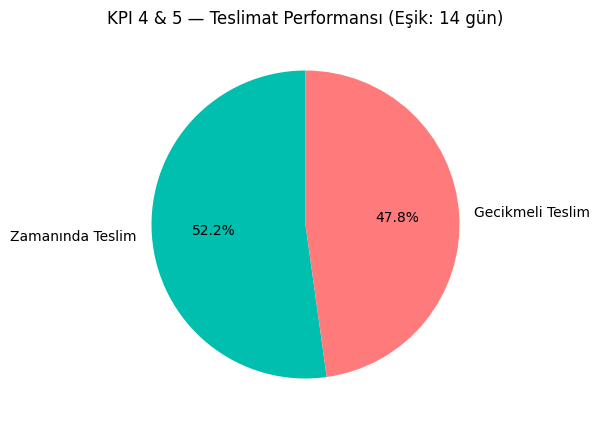

In [10]:
#Teslimat süresi eşiğinin hesaplanması

threshold_days = 14
on_time_rate = (orders['delivery_time_days'] <= threshold_days).mean() * 100
late_delivery_rate = (orders['delivery_time_days'] > threshold_days).mean() * 100
print(f"Zamanında Teslim Oranı (On-Time Delivery Rate): %{on_time_rate:.2f}")
print(f"Gecikmeli Teslim Oranı (Late Delivery Rate): %{late_delivery_rate:.2f}")

# Görselleştirme — dairesel grafik
labels = ['Zamanında Teslim', 'Gecikmeli Teslim']
values = [on_time_rate, late_delivery_rate]
colors = ['#00bfae', '#ff7b7b']

plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f"KPI 4 & 5 — Teslimat Performansı (Eşik: {threshold_days} gün)")
plt.show()


Bu analiz çalışmasında, orders ve sales tabloları birleştirilerek sipariş ve satış süreçlerine yönelik 9 temel KPI oluşturulmuştur. Veri temizleme ve hazırlık adımlarının ardından; sipariş trendleri, ortalama sipariş değeri (AOV), müşteri başına sipariş oranı, sipariş sıklığı ve aylık büyüme oranları analiz edilmiştir. Operasyonel boyutta ise teslim süresi performansı incelenmiş, zamanında ve gecikmeli teslim oranları hesaplanmıştır. Bu çalışma, satış hacmi ve operasyonel verimlilik açısından sipariş süreçlerinin genel performansını değerlendirmek amacıyla hazırlanmıştır.

In [26]:
from scipy.stats import pearsonr
import pandas as pd


df = pd.read_csv("orders_with_churn_and_payment.csv")
orders = pd.read_csv("orders_updated.csv")

df.rename(columns={'churn': 'is_churned'}, inplace=True)

orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')
orders['delivery_date'] = pd.to_datetime(orders['delivery_date'], errors='coerce')
orders['delivery_time_days'] = (orders['delivery_date'] - orders['order_date']).dt.days


df = pd.merge(df, orders[['order_id', 'delivery_time_days']], on='order_id', how='left')
data = df[['delivery_time_days', 'is_churned']].dropna()

corr_matrix = data.corr()

print(" Korelasyon Matrisi:")
print(corr_matrix)

 Korelasyon Matrisi:
                    delivery_time_days  is_churned
delivery_time_days            1.000000   -0.061937
is_churned                   -0.061937    1.000000


Korelasyon Katsayısı (r): -0.062

 H₀ reddedilemedi → Teslim süresi ile churn arasında anlamlı bir ilişki YOK.

In [31]:
import plotly.express as px

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title=" Teslim Süresi ve Churn Korelasyon Heatmap",
)

fig.update_layout(
    title_x=0.5,
    title_font=dict(size=18),
    xaxis_title="Değişkenler",
    yaxis_title="Değişkenler"
)

fig.show()
